# Toronto Dwellings Analysis Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions to create a Panel dashboard.

In [40]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact

In [41]:
# Initialize the Panel Extensions (for Plotly)
import panel as pn
pn.extension("plotly")

In [42]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [43]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

### Global available data

In [44]:
to_data.head(20)

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163
2001,Bathurst Manor,2405,1550,0,130,130,375,745,0,304749,843,1052
2001,Bay Street Corridor,10,7575,0,0,15,0,240,0,257404,1218,1142
2001,Bayview Village,2170,630,0,170,765,15,640,0,327644,1197,1164
2001,Bayview Woods-Steeles,1650,1715,0,925,105,10,170,5,343535,1212,1018


In [45]:
neighbourhood_list = to_data.iloc[:,0:9]

In [46]:
dwelling_types = [
    'single_detached_house', 
    'apartment_five_storeys_plus' ,
    'movable_dwelling',
    'semi_detached_house',
    'row_house',
    'duplex',
    'apartment_five_storeys_less',
    'other_house'

]


In [47]:
# Getting the data from the top 10 expensive neighbourhoods
expensive_neighbourhoods = to_data.groupby(by="neighbourhood").mean()
expensive_neighbourhoods = expensive_neighbourhoods.sort_values(by = 'average_house_value', ascending=False).head(10)
expensive_neighbourhoods = expensive_neighbourhoods.reset_index()
expensive_neighbourhoods


,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,Bridle Path-Sunnybrook-York Mills,2260.00,331.25,0.00,36.25,90.00,25.0,40.00,0.00,1526485.75,2360.75,2321.75
1,Forest Hill South,1742.50,2031.25,1.25,61.25,45.00,75.0,1027.50,3.75,1195992.50,1781.00,1313.75
2,Lawrence Park South,3472.50,773.75,0.00,126.25,38.75,225.0,966.25,16.25,1094027.75,1954.00,1372.75
3,Rosedale-Moore Park,2498.75,4641.25,0.00,486.25,245.00,327.5,1618.75,2.50,1093640.00,1909.75,1537.25
4,St.Andrew-Windfields,3225.00,1670.00,0.00,185.00,552.50,97.5,586.25,5.00,999107.00,1880.25,1384.50
5,Casa Loma,916.25,2310.00,0.00,288.75,201.25,162.5,1192.50,2.50,981064.25,1873.75,1547.75
6,Bedford Park-Nortown,4865.00,1981.25,0.00,43.75,57.50,287.5,1275.00,88.75,930415.25,1786.75,1255.00
7,Forest Hill North,1488.75,3392.50,0.00,12.50,16.25,82.5,402.50,1.25,851680.50,1722.75,1245.50
8,Kingsway South,2326.25,576.25,0.00,66.25,48.75,20.0,336.25,2.50,843234.25,1736.75,1622.00
9,Yonge-St.Clair,565.00,3948.75,0.00,425.00,212.50,172.5,1308.75,6.25,813220.25,1680.75,1369.00


In [48]:
all_expensive_neighbourhood = to_data[to_data['neighbourhood'].isin(expensive_neighbourhoods['neighbourhood'])]
all_expensive_neighbourhood = all_expensive_neighbourhood.reset_index()
all_expensive_neighbourhood

,year,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,2001,Bedford Park-Nortown,4985,2080,0,45,40,210,1235,15,565304,933,1491
1,2001,Bridle Path-Sunnybrook-York Mills,2275,110,0,25,15,10,20,0,927466,1983,1790
2,2001,Casa Loma,1035,1700,0,415,190,185,1090,5,596077,1241,1500
3,2001,Forest Hill North,1565,3380,0,10,0,0,485,5,517466,940,1428
4,2001,Forest Hill South,1815,2440,5,65,45,85,1010,15,726664,1001,1469
5,2001,Kingsway South,2370,260,0,65,45,0,340,10,512334,1362,1340
6,2001,Lawrence Park South,3590,570,0,170,70,190,845,40,664712,1021,1630
7,2001,Rosedale-Moore Park,2610,3880,0,520,225,290,1735,0,664476,1219,1540
8,2001,St.Andrew-Windfields,3275,1455,0,220,555,45,525,5,607040,1055,1551
9,2001,Yonge-St.Clair,670,3625,0,410,200,280,1020,25,494098,1091,1351


In [49]:

# Calculate the mean number of dwelling types units per year
all_dwelling_df = to_data.drop(columns=["average_house_value", "shelter_costs_owned", "shelter_costs_rented"])
all_dwelling_df.head()


,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
year,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0
2001,Alderwood,3175,315,0,470,50,185,370,0
2001,Annex,1060,6090,5,1980,605,275,3710,165
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0


In [50]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
housing_units = all_dwelling_df.groupby('year').sum()
housing_units.head()

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
year,,,,,,,,
2001,300930,355015,75,90995,52355,23785,116900,3040
2006,266860,379400,165,69430,54690,44095,162850,1335
2011,274940,429220,100,72480,60355,44750,163895,2165
2016,269680,493270,95,71200,61565,48585,165575,2845


In [51]:

# Calculate the average monthly shelter costs for owned and rented dwellings

avg_df = to_data[['shelter_costs_owned','shelter_costs_rented']].groupby([to_data.index]).mean()


In [89]:
# Calculate the average house value per year
avg_house = pd.DataFrame().assign(average_house_value = to_data['average_house_value']) 
avg_house_df = avg_house.groupby('year').mean()
avg_house_df

,average_house_value
year,
2001,289882.885714
2006,424059.664286
2011,530424.721429
2016,664068.328571


In [53]:
avg_df

,shelter_costs_owned,shelter_costs_rented
year,,
2001,846.878571,1085.935714
2006,1316.800000,925.414286
2011,1448.214286,1019.792857
2016,1761.314286,1256.321429


### Panel Visualization Functions

In [54]:
# pylint: disable=unused-variable
# Define Panel visualization functions
def neighbourhood_map():

    """Neighbourhood Map"""
   
    df_mean_neighbourhood = to_data.groupby('neighbourhood').mean()
    df_mean_neighbourhood = df_mean_neighbourhood.reset_index()
    df_all_neighbourhood_locations = pd.merge(df_neighbourhood_locations, df_mean_neighbourhood, on = 'neighbourhood')

    map_plot = px.scatter_mapbox(
    df_all_neighbourhood_locations,
    lat = 'lat',
    lon= 'lon',
    size = 'average_house_value',
    color = 'average_house_value',
    title= 'Average House Values in Toronto',
    zoom= 9
    

    )
    return map_plot.update_layout(mapbox_style = 'open-street-map',autosize = False, height = 700, width = 1200)


In [55]:

def create_bar_chart(data, title, xlabel, ylabel, color):
    """
    Create a barplot based in the data argument.
    """
    fig = plt.figure()
    bar_chart = data.plot.bar(color=color, xlabel = xlabel, ylabel = ylabel,  title = title)
    plt.close(fig)
    return fig


In [82]:

def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.
    """
    
    line_fig = plt.figure()
    line_chart = data.plot.line(color = color, xlabel =xlabel, ylabel = ylabel, title = title )
    plt.close(line_fig)

    return line_fig
 

In [93]:
   
def average_house_value():
    """Average house values per year."""
     
    avg_value = create_line_chart(
        avg_house_df,
        'Average House Value in Toronto',
        'year',
        'Avg house value',
        'red'
    )

    # return avg_value



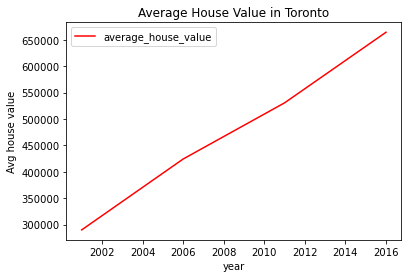

In [94]:
average_house_value()

In [88]:

def average_value_by_neighbourhood():
    """Average house values by neighbourhood."""
    
    df_average_value = to_data[['neighbourhood', 'average_house_value']]
    df_average_value.reset_index(inplace=True)
    house_value_chart = df_average_value.hvplot.line(

        x = 'year', 
        y = 'average_house_value', 
        groupby = 'neighbourhood'
    )

    return house_value_chart



In [59]:

def number_dwelling_types():
    """Number of dwelling types per year"""
    
    all_dwelling_plot = all_dwelling_df.hvplot(
         xlabel= 'Year',
         ylabel= 'Dwelling Type Units', 
         rot= 90,height=600, 
         groupby = 'neighbourhood', 
         kind = 'bar' )

    return all_dwelling_plot


In [75]:

def average_house_value_snapshot():
    """Average house value for all Toronto's neighbourhoods per year."""

    average_house_plot = px.bar(
        to_data,
        x='neighbourhood', 
        y= 'average_house_value', 
        height = 1000,
        title = 'Average House Value in Toronto')

    return average_house_plot
 

In [76]:
   
def top_most_expensive_neighbourhoods():
    """Top 10 most expensive neighbourhoods."""
    
    exp_neighbourhood_plot = expensive_neighbourhoods.hvplot.bar(
        'neighbourhood',
        'average_house_value',
        xlabel = 'Neighbourhood',
        ylabel = 'AV House Value',
        title = 'Top exp neighb'

    )

    return exp_neighbourhood_plot


In [77]:

def sunburts_cost_analysis():
    """Sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year."""
    
    sunburst = px.sunburst(
    all_expensive_neighbourhood,
    path= ['year', 'neighbourhood'],
    values= 'average_house_value',
    color= 'shelter_costs_owned',
    hover_data= ['shelter_costs_owned', 'shelter_costs_rented'],
    color_continuous_scale= 'Blues',
    title = "Costs Analysis of Most Expensive Neighbourhoods in Toronto per Year",
    height= 500,
    width = 500

    )
    return sunburst


## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

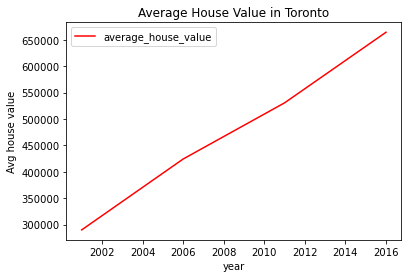

In [95]:
# Create a Title for the Dashboard
title = "## Real Estate Analysis of Toronto from 2001 to 2016 "

# Define a welcome text
welcome = "# This dashboard presents a visual analysis of historical values, dwelling types per neighbourhood and dwelling costs "

#Put the neighbourhood map in a row
neighbourhood_row = pn.Row(neighbourhood_map)

# Create a tab layout for the dashboard
welcome_column = pn.Column(welcome, neighbourhood_row)

# Put rows in a column
yearly_analysis_column = pn.Column(

    pn.Row(
        create_bar_chart(
            housing_units.loc[2001],
            'Dwelling types in toronto in 2001',
            '2001',
            'Dwelling Type Units',
            'red'),
        create_bar_chart(
            housing_units.loc[2006],
            'Dwelling types in toronto in 2006',
            '2006',
            'Dwelling Type Units',
            'blue')
            ) ,
    pn.Row(
        create_bar_chart(
            housing_units.loc[2011],
            'Dwelling types in toronto in 2011',
            '2011',
            'Dwelling Type Units',
            'gold'),
        create_bar_chart(
            housing_units.loc[2006],
            'Dwelling types in toronto in 2016',
            '2016',
            'Dwelling Type Units',
            'purple')
        ),
   

)


#Put line chart in a column
shelter_costs_column = pn.Column(
    create_line_chart(
        avg_df['shelter_costs_owned'],
        'Average Monthly Shelter Costs Owned Dwellings in Toronto',
        'Year',
        'Avg Monthly Shelter Costs',
        'blue'),
        

    create_line_chart(
        avg_df['shelter_costs_rented'],
        'Average Monthly Shelter Costs Rented Dwellings in Toronto',
        'Year',
        'Avg Monthly Shelter Costs',
        'gold'),
        
    average_house_value()
        
)
#neighbourhood analysis column
neighbourhood_analysis_column = pn.Column(average_value_by_neighbourhood(), number_dwelling_types() )

#Put expensive neighbourhoods in a row
top_expensive_neighbourhoods_column = pn.Column(
    pn.Row(top_most_expensive_neighbourhoods()
    ),
    pn.Row( sunburts_cost_analysis())
)

# Create the main dashboard
to_real_estate_dashboard_tabs = pn.Tabs(
    (
        "Welcome",
        welcome_column
    ),
    (
        "Yearly Market Analysis",
        yearly_analysis_column
    ),
    (
        "Shelter Costs Vs. House Value",
        shelter_costs_column
    ),
    (
        "Neighbourhood Analysis",
        neighbourhood_analysis_column
    ),
    (
        "Top Expensive Neighbourhoods",
        top_expensive_neighbourhoods_column
    )
)

to_real_estate_dashboard = pn.Column(title, to_real_estate_dashboard_tabs)



## Serve the Panel Dashboard

In [79]:
to_real_estate_dashboard.servable()

BokehModel(combine_events=True, render_bundle={'docs_json': {'e09219ec-2754-4293-bf01-37eb2bb4c1ca': {'defs': …

Column
    [0] Markdown(str)
    [1] Tabs
        [0] Column
            [0] Markdown(str)
            [1] Row
                [0] Column
                    [0] Column()
                    [1] Row
                        [0] Plotly(Figure, name='interactive04768')
        [1] Column
            [0] Row
                [0] Matplotlib(Figure)
                [1] Matplotlib(Figure)
            [1] Row
                [0] Matplotlib(Figure)
                [1] Matplotlib(Figure)
        [2] Column
            [0] Matplotlib(Figure)
            [1] Matplotlib(Figure)
            [2] Plotly(Figure)
        [3] Column
            [0] Row
                [0] HoloViews(DynamicMap)
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                    [1] VSpacer()
            [1] Row
                [0] HoloViews(DynamicMap)
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                    [1] VSpacer()
        [4] Column
            [0] Row
                [0] HoloViews(Bars)
            [1] Row
                [0] Plotly(Figure)

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

In [ ]:
# neighbourhood_map().show()

In [ ]:
# # create_bar_chart(data, title, xlabel, ylabel, color)

# # Bar chart for 2001
# create_bar_chart(df_dwelling_units.loc[2001], "Dwelling Types in Toronto in 2001", "2001", "Dwelling Type Units", "red")

# # Bar chart for 2006
# create_bar_chart(df_dwelling_units.loc[2006], "Dwelling Types in Toronto in 2006", "2006", "Dwelling Type Units", "blue")

# # Bar chart for 2011
# create_bar_chart(df_dwelling_units.loc[2011], "Dwelling Types in Toronto in 2011", "2011", "Dwelling Type Units", "orange")

# # Bar chart for 2016
# create_bar_chart(df_dwelling_units.loc[2016], "Dwelling Types in Toronto in 2016", "2016", "Dwelling Type Units", "magenta")

In [ ]:
# # create_line_chart(data, title, xlabel, ylabel, color)

# # Line chart for owned dwellings
# create_line_chart(df_avg_costs["shelter_costs_owned"], "Average Monthly Shelter Cost for Owned Dwellings in Toronto", "Year", "Avg Monthly Shelter Costs", "blue")

# # Line chart for rented dwellings
# create_line_chart(df_avg_costs["shelter_costs_rented"], "Average Monthly Shelter Cost for Rented Dwellings in Toronto", "Year", "Avg Monthly Shelter Costs", "orange")

In [ ]:
average_house_value()

In [ ]:
average_value_by_neighbourhood()

In [ ]:
number_dwelling_types()

In [ ]:
average_house_value_snapshot()

In [ ]:
top_most_expensive_neighbourhoods()

In [ ]:
sunburts_cost_analysis()